##Task 1:Prediction using Supervised ML


Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

Importing the Data 

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Exploratory Data Analysis

In [3]:
data.shape

(25, 2)

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


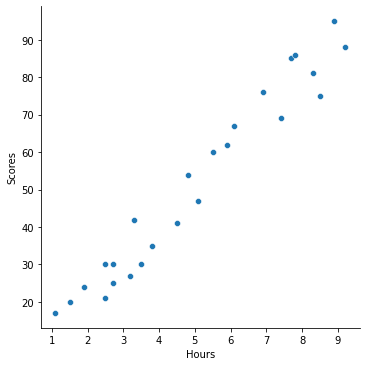

In [7]:
sns.relplot(x='Hours',y='Scores',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


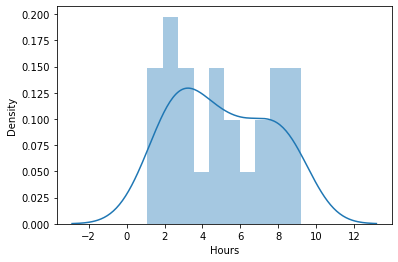

In [8]:
sns.distplot(data['Hours'],bins=10)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


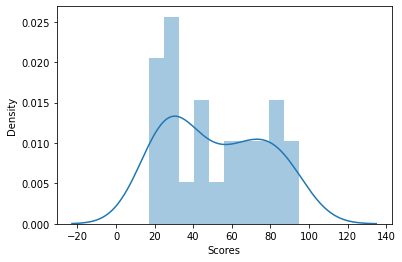

In [9]:
sns.distplot(data['Scores'],bins=10)

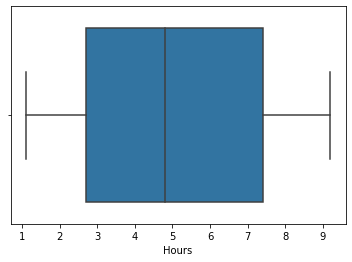

In [10]:
sns.boxplot(x='Hours',data=data)

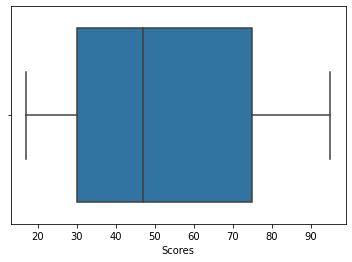

In [11]:
sns.boxplot(x='Scores',data=data)

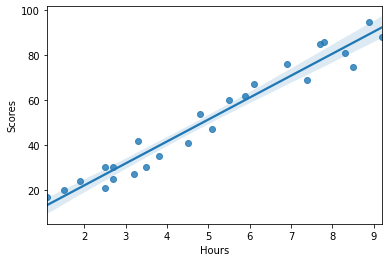

In [13]:
sns.regplot(x='Hours',y='Scores',data=data)

Training the Model

In [14]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

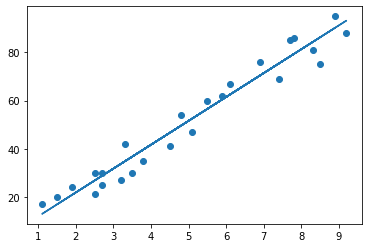

In [17]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Testing The Model

In [18]:
predict=regressor.predict(X_test)

In [19]:
for i in range(len(y_test)):
  print(f'Actual Score :{y_test[i]}  Predicted Score:{predict[i]}')

Actual Score :20  Predicted Score:16.884144762398023
Actual Score :27  Predicted Score:33.732260779489835
Actual Score :69  Predicted Score:75.35701799818725
Actual Score :30  Predicted Score:26.79480124304026
Actual Score :62  Predicted Score:60.491033277223885


Loss 

In [20]:
from sklearn import metrics

In [21]:
print(f"Mean Absolute Error :{metrics.median_absolute_error(y_test,predict)}")
print(f'Mean Squared Error:{metrics.mean_squared_error(y_test,predict)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,predict))}')

Mean Absolute Error :3.2051987569597387
Mean Squared Error:21.598769307217456
RMSE : 4.647447612100373


Predicting the score for 9.25 hrs/day

In [27]:
predict = regressor.predict([[9.25]])
print(predict)

[93.69173249]


##Thank You